## El método del codo y factor silueta del clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1,x2))).reshape(len(x1), 2)

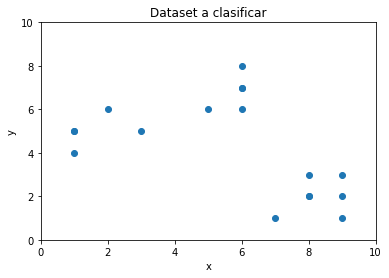

In [4]:
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1,x2)
plt.show()

In [20]:
## definimos el número maximo de iteraciones, máximo número que vamos a crear
from matplotlib.pyplot import axis


max_k=10
K=range(1,max_k)
## guardar la súma de los cuadrados internos, para poder hacer el gráfico del codo
ssw = []
# creamos una paleta de colores tanto como el máximo de k
color_palette=[ plt.cm.Spectral(float(i)/max_k) for i in K]
## centroides, nos ayudara en la súma de los cuadrados totales
centroid= [sum(X)/len(X) for i in K]
## súma de los cuadrados totales, el mínimo de las distancias de cada uno de los datasets y el centroide
## usando la distancia euclidia, por filas
sst=sum(np.min(cdist(X, centroid, "euclidean"), axis=1))

c:\Users\Golfa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


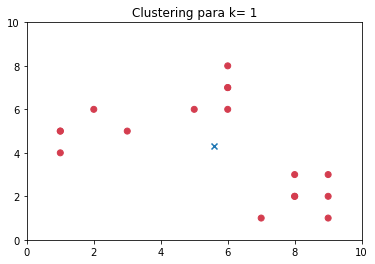

para el K=2 el promedio de la silueta es de : 0.6113424368705715
      - para i=1 la silueta del cluster vale: 0.49704450958269375
      - para i=2 la silueta del cluster vale: 0.7746251901389686


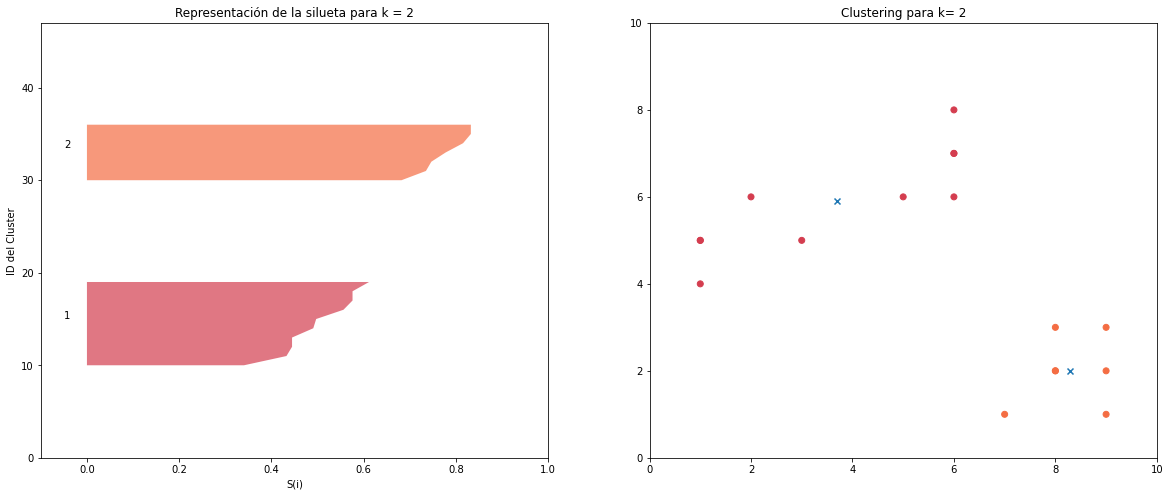

para el K=3 el promedio de la silueta es de : 0.7122079383287169
      - para i=1 la silueta del cluster vale: 0.7345257364682265
      - para i=2 la silueta del cluster vale: 0.6609508863896014
      - para i=3 la silueta del cluster vale: 0.7322200728725188


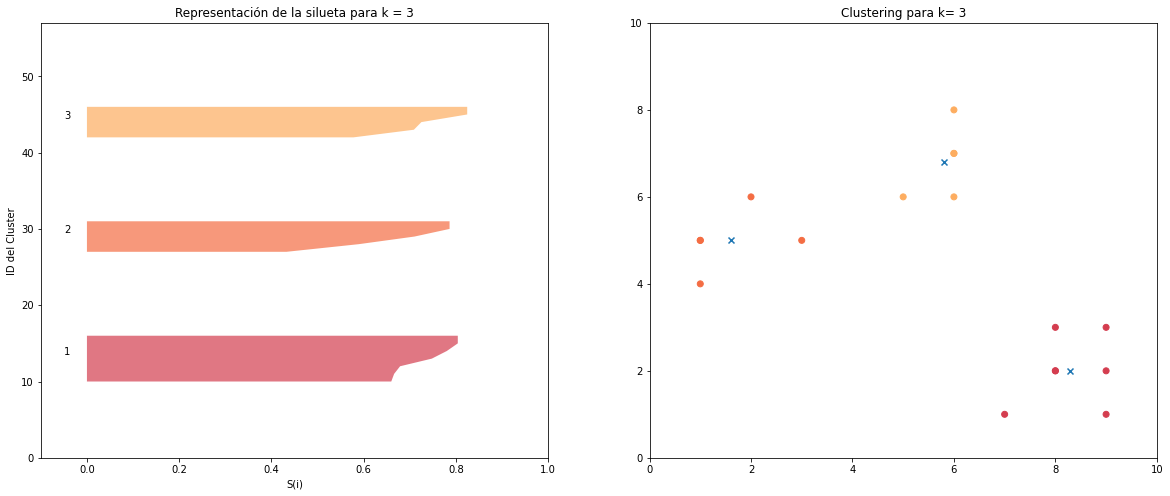

para el K=4 el promedio de la silueta es de : 0.6389948643127632
      - para i=1 la silueta del cluster vale: 0.7345257364682265
      - para i=2 la silueta del cluster vale: 0.655666655624379
      - para i=3 la silueta del cluster vale: 0.654458796162702
      - para i=4 la silueta del cluster vale: 0.24096929517637128


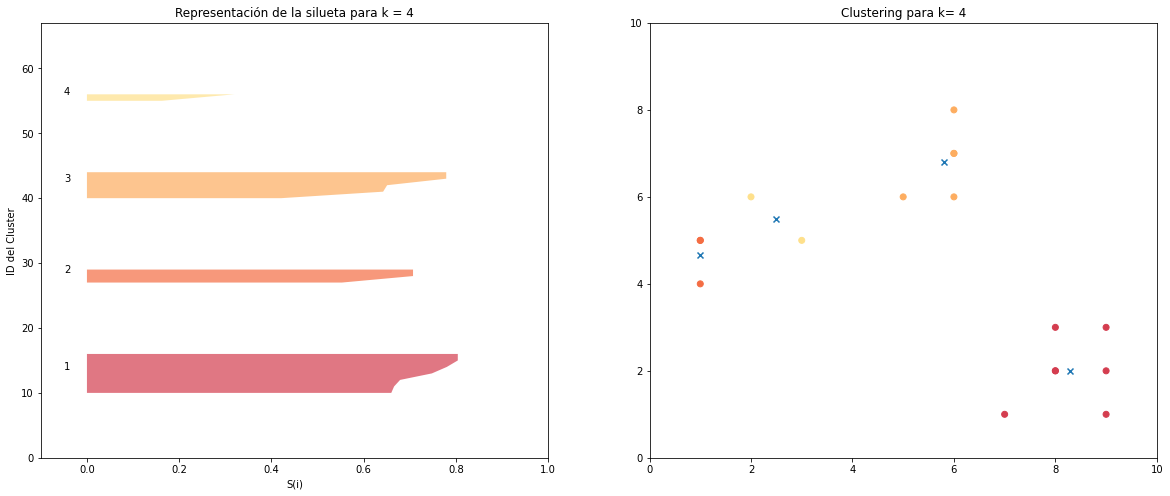

para el K=5 el promedio de la silueta es de : 0.46983374375750137
      - para i=1 la silueta del cluster vale: 0.24096929517637128
      - para i=2 la silueta del cluster vale: 0.37765685097302226
      - para i=3 la silueta del cluster vale: 0.654458796162702
      - para i=4 la silueta del cluster vale: 0.0
      - para i=5 la silueta del cluster vale: 0.655666655624379


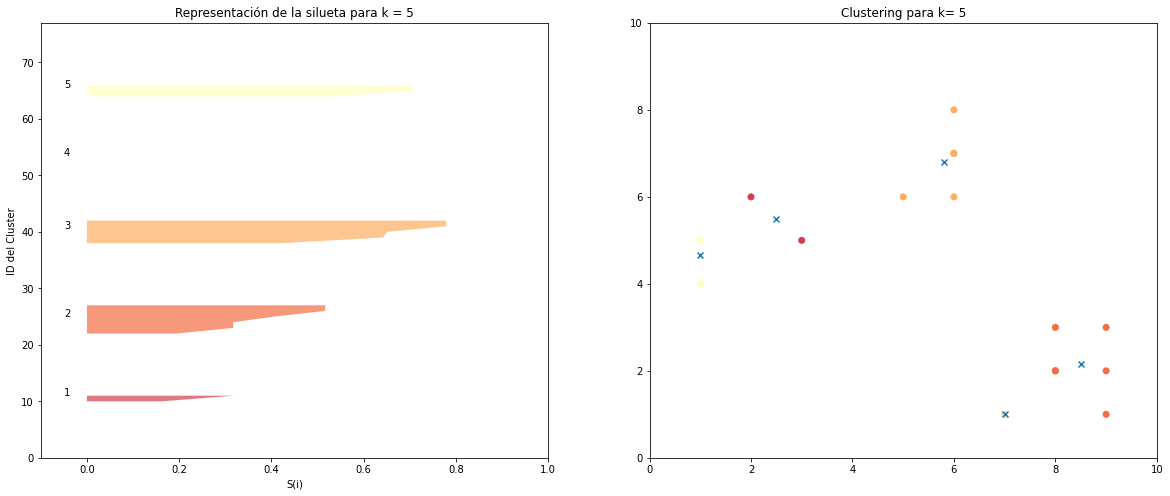

para el K=6 el promedio de la silueta es de : 0.39661977826122785
      - para i=1 la silueta del cluster vale: -0.09040786759303471
      - para i=2 la silueta del cluster vale: 0.24096929517637128
      - para i=3 la silueta del cluster vale: 0.5664789734180768
      - para i=4 la silueta del cluster vale: 0.655666655624379
      - para i=5 la silueta del cluster vale: 0.32882042637679976
      - para i=6 la silueta del cluster vale: 0.42346712707864664


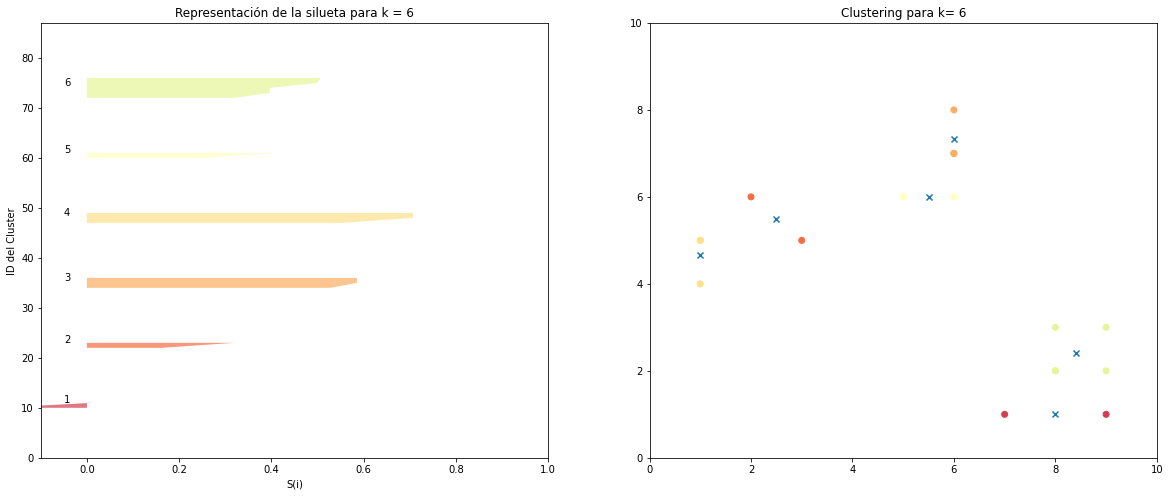

para el K=7 el promedio de la silueta es de : 0.3889390504750796
      - para i=1 la silueta del cluster vale: 0.24096929517637128
      - para i=2 la silueta del cluster vale: 0.3028895866899326
      - para i=3 la silueta del cluster vale: 0.5664789734180768
      - para i=4 la silueta del cluster vale: 0.0
      - para i=5 la silueta del cluster vale: 0.655666655624379
      - para i=6 la silueta del cluster vale: 0.30004208861569454
      - para i=7 la silueta del cluster vale: 0.32882042637679976


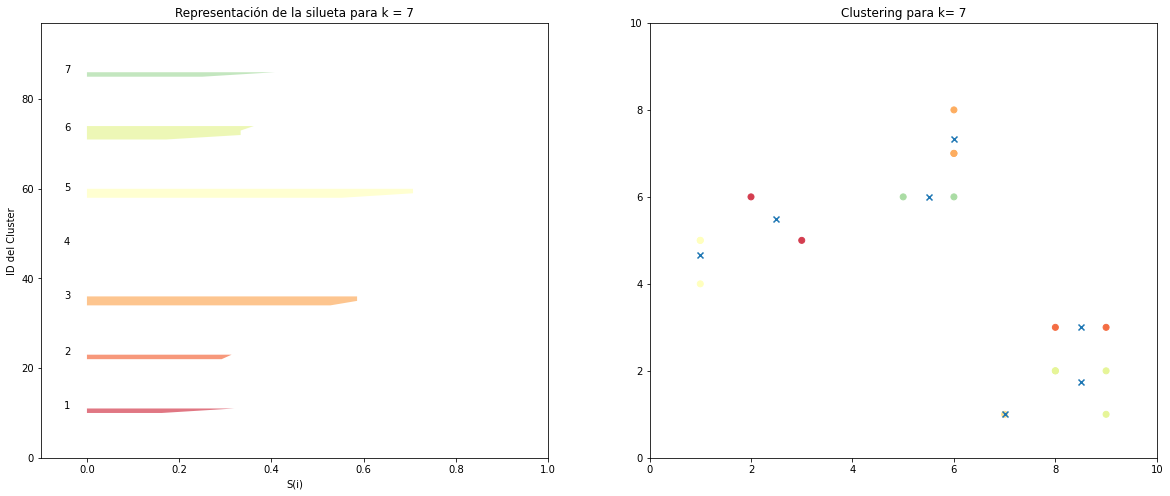

para el K=8 el promedio de la silueta es de : 0.37560176813183055
      - para i=1 la silueta del cluster vale: 0.20382042637679978
      - para i=2 la silueta del cluster vale: 0.24096929517637128
      - para i=3 la silueta del cluster vale: 0.5664789734180768
      - para i=4 la silueta del cluster vale: 0.39052429175126996
      - para i=5 la silueta del cluster vale: 0.655666655624379
      - para i=6 la silueta del cluster vale: 0.32882042637679976
      - para i=7 la silueta del cluster vale: 0.0
      - para i=8 la silueta del cluster vale: 0.0


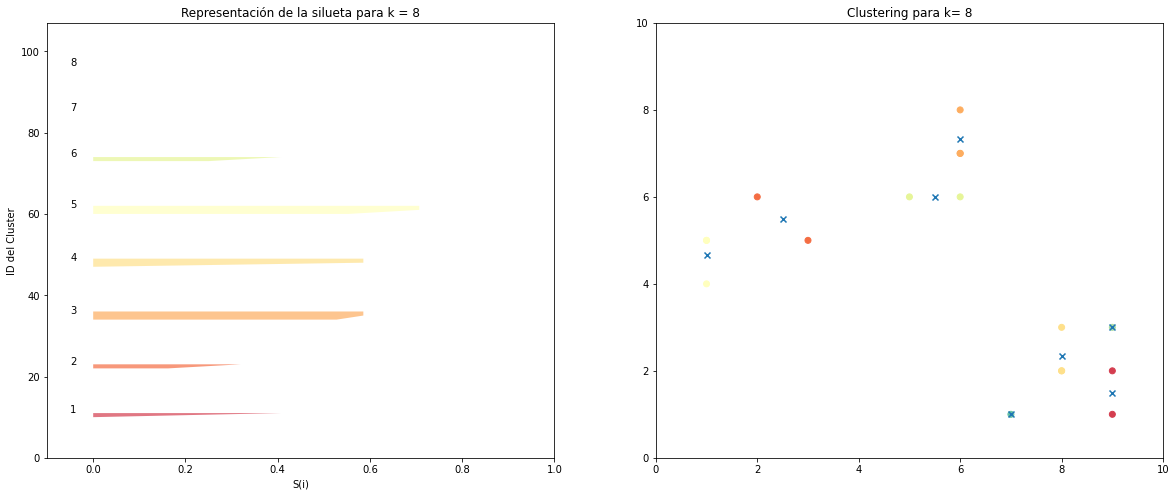

para el K=9 el promedio de la silueta es de : 0.39932610787930767
      - para i=1 la silueta del cluster vale: 0.0
      - para i=2 la silueta del cluster vale: 0.14644660940672627
      - para i=3 la silueta del cluster vale: 0.32882042637679976
      - para i=4 la silueta del cluster vale: 0.6152265411044983
      - para i=5 la silueta del cluster vale: 0.0
      - para i=6 la silueta del cluster vale: 0.14644660940672627
      - para i=7 la silueta del cluster vale: 0.5664789734180768
      - para i=8 la silueta del cluster vale: 0.0
      - para i=9 la silueta del cluster vale: 1.0


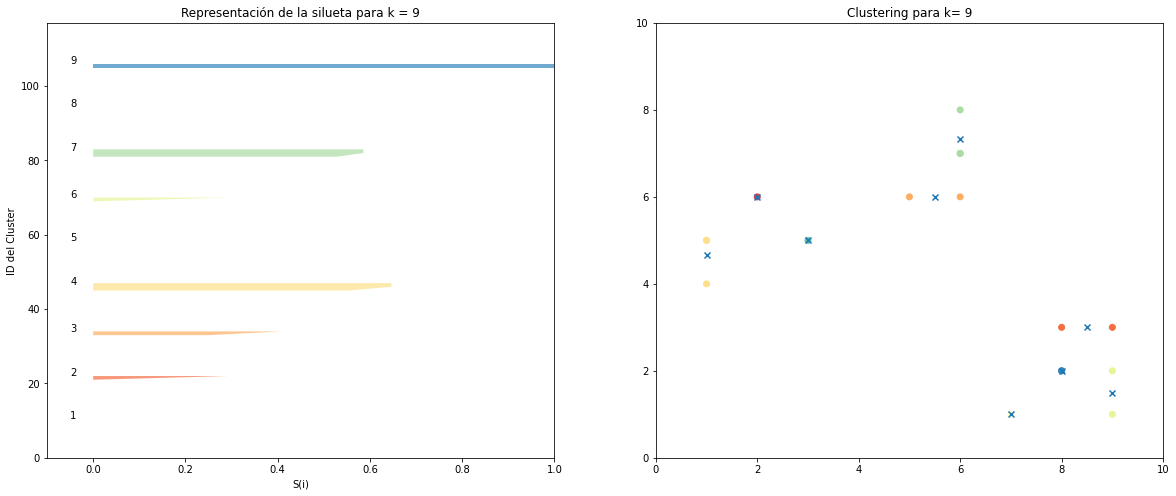

In [47]:
## hacer kmeans para cada rango definido
for k in K:
    ## hacemos el módelo de datos, k define el número de clusters a crear
    kmeanModel=KMeans(n_clusters=k).fit(X)
    ## guardar los varicentros
    centers=pd.DataFrame(kmeanModel.cluster_centers_)
    ## a que cluster pertenece cada uno
    labels=kmeanModel.labels_

    ## detectar la súma de los cuadrados de las diferencias para ese k, pasamos la x y los varicentros obtenidos
    ## axis lo hace por filas, lo que hace es medir la distancia de cada punto, al varicentro del cluster
    ##  respectivo
    ssw_K=sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis=1))
    ## guardamos la súma de los cuadrados de esta iteración
    ssw.append(ssw_K)
    ## pintamos cada etiqueda de acuerdo al array de colores
    label_color=[color_palette[i] for i in labels]





    ## fabricar una silueta para cada cluster
    ## la silueta solo es posible si k es mayor a 1 y si es menor al tamaño
    if 1<k<len(X):
        ## crear un subplot de una fila y dos columnas
         ##pintaremos una silueta por un lado y un cluster por otro
        fig, (axis1, axis2)=plt.subplots(1,2)
        ## cambiamos el tamño de la figura
        fig.set_size_inches(20, 8)

        ## dibujamos el primer subplot, que puede tener valores desde -1 a 1
        ## escalamos el gráfico, los valores están entre -0.1 y 1
        axis1.set_xlim([-0.1, 1.0])
        ## El número de clusters a insertar determinará el tamaño de cada barra
        ## el coeficiente (n_clusters+1)*10 será el espacio en blanco que dejaremos entre siluetas
        ## individuales de cada cluster para separarlas
        axis1.set_ylim([0, len(X)+(k+1)*10])
        
        ## obtenemos el silluete
        silhoette_avg=silhouette_score(X, labels)
        ## una forma de saber si el número de clusters es optimo es si el coeficiente promedio de todas siluetas
        ## parecido al número de siluet
        print("para el K=%s el promedio de la silueta es de : %s"%(k, silhoette_avg))
        
        sample_silhoette_values=silhouette_samples(X, labels)

        ## esta variabe ira subiendo paulatinamente, en función del tamaño del cluster
        y_lower=10
        for i in range(k):
            



            ## agregamos la siluetta del cluster i-esimo
            ## donde labels coincida con la etiqueta que estoy utilizand
            ith_cluster_sv = sample_silhoette_values[labels == i]
            ## muestro el promedio de todos los valores
            print("      - para i=%s la silueta del cluster vale: %s"%(i+1, np.mean(ith_cluster_sv)))
            ## ordenamos los resultados, descendientemente del cluster
            ith_cluster_sv.sort()

            ##el tamño del cluster
            ## nosquedamos con el número de filas 
            ## para que nos quede escalado correctamente en el eje vertical 
            ## calculamos donde color la silueta en el eje vertical 
            ith_cluster_size=ith_cluster_sv.shape[0]
            y_upper=y_lower + ith_cluster_size

            ##elegimos el color del cluster 
            color=color_palette[i]

            ## construimos la silueta
            axis1.fill_betweenx(np.arange(y_lower, y_upper), 
            0, ith_cluster_sv, facecolor=color, alpha=0.7)

            ## etiquetamos el cluster con el número en el centro de la figura
            axis1.text(-0.05, y_lower+0.5*ith_cluster_size, str(i+1))
            
            ## calculamos el nuevo y_lower para el siguiente cluster del gráfico 
            y_lower=y_upper+10 ## dejamos vacías 10 posiciones sin muestra 
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")
        ## fin de la representación de la silueta
    ## plot de los k means con los puntos respectivos 
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k= %s"%(k))
    plt.scatter(x1,x2, c=label_color)
    #para pintar los varicentros
    plt.scatter(centers[0], centers[1], marker="x")
    plt.show()




In [25]:
len(x1),len(x2), len(local)

(17, 17)

c:\Users\Golfa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


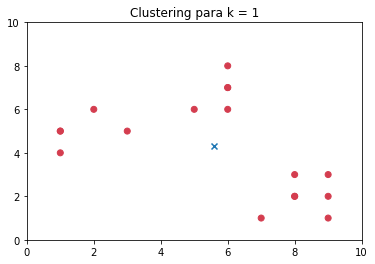

* Para k =  2  el promedio de la silueta es de : 0.6113424368705715
   - Para i =  1  la silueta del cluster vale :  0.49704450958269375
   - Para i =  2  la silueta del cluster vale :  0.7746251901389686


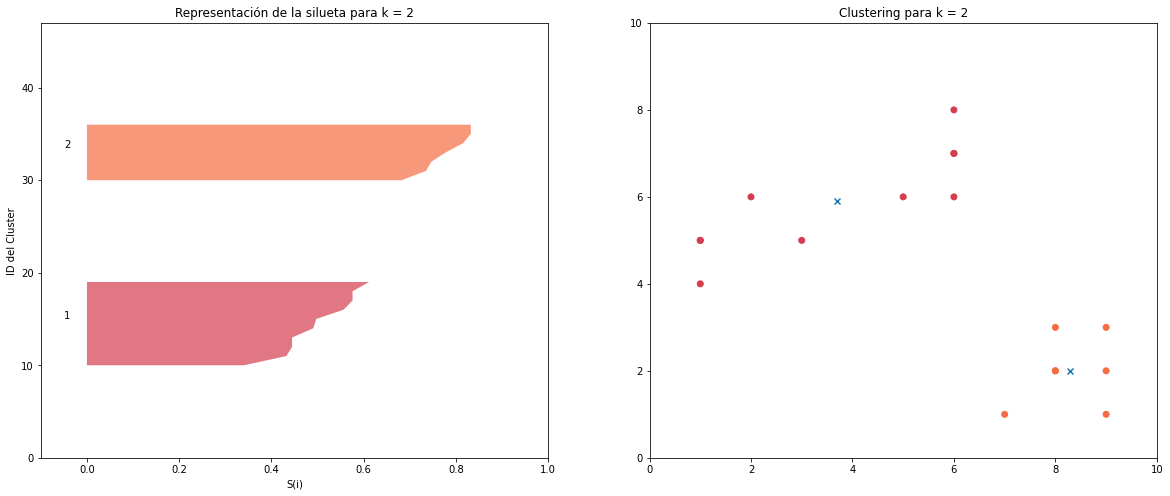

* Para k =  3  el promedio de la silueta es de : 0.7122079383287169
   - Para i =  1  la silueta del cluster vale :  0.6609508863896014
   - Para i =  2  la silueta del cluster vale :  0.7345257364682265
   - Para i =  3  la silueta del cluster vale :  0.7322200728725188


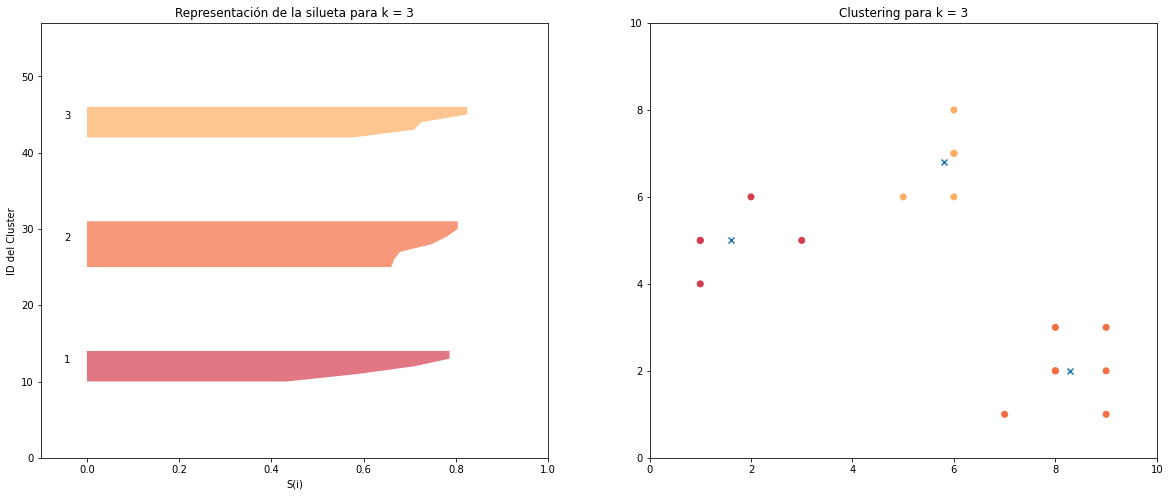

* Para k =  4  el promedio de la silueta es de : 0.6389948643127632
   - Para i =  1  la silueta del cluster vale :  0.24096929517637128
   - Para i =  2  la silueta del cluster vale :  0.7345257364682265
   - Para i =  3  la silueta del cluster vale :  0.654458796162702
   - Para i =  4  la silueta del cluster vale :  0.655666655624379


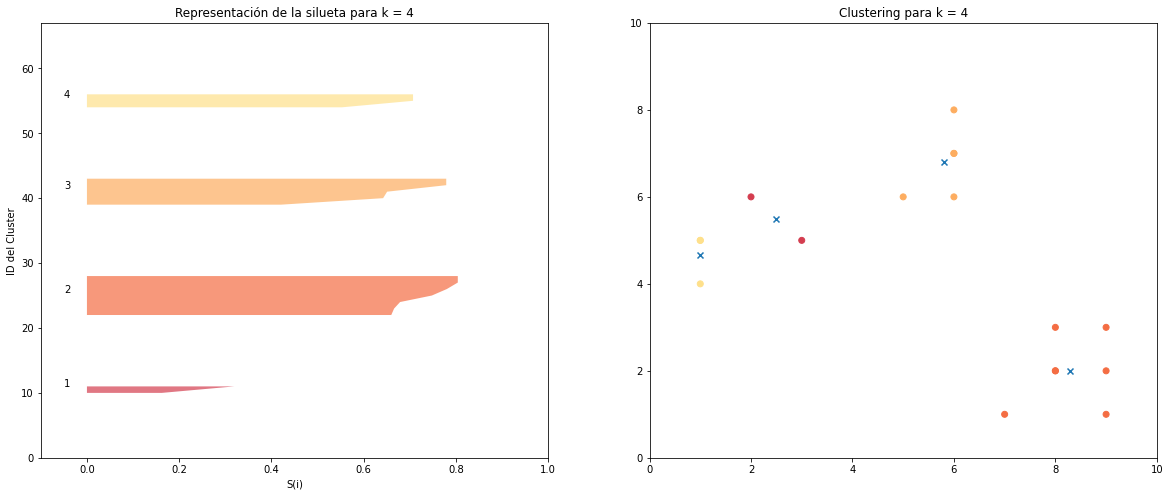

* Para k =  5  el promedio de la silueta es de : 0.46983374375750137
   - Para i =  1  la silueta del cluster vale :  0.37765685097302226
   - Para i =  2  la silueta del cluster vale :  0.24096929517637128
   - Para i =  3  la silueta del cluster vale :  0.654458796162702
   - Para i =  4  la silueta del cluster vale :  0.655666655624379
   - Para i =  5  la silueta del cluster vale :  0.0


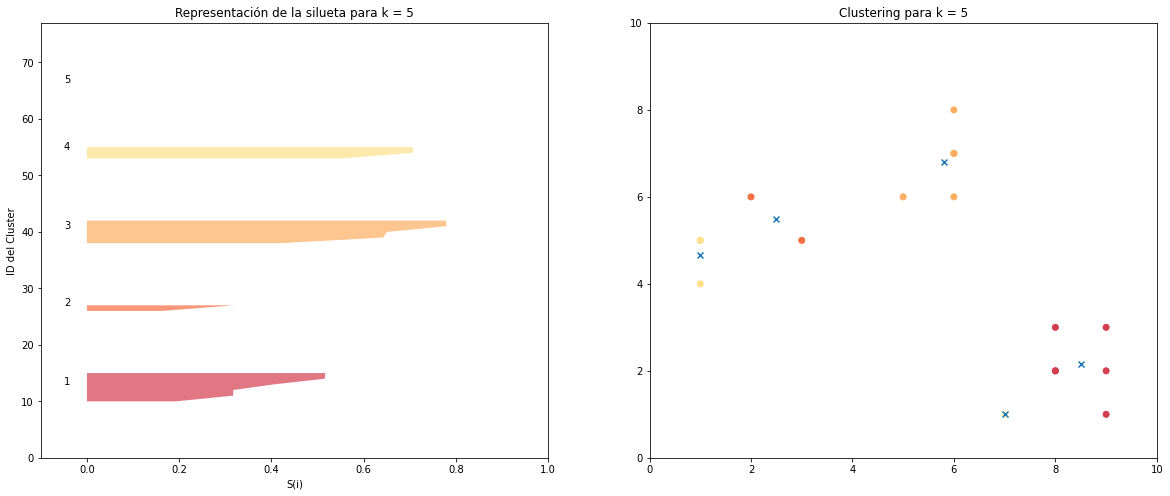

* Para k =  6  el promedio de la silueta es de : 0.4159974962395202
   - Para i =  1  la silueta del cluster vale :  0.32882042637679976
   - Para i =  2  la silueta del cluster vale :  0.37765685097302226
   - Para i =  3  la silueta del cluster vale :  0.655666655624379
   - Para i =  4  la silueta del cluster vale :  0.24096929517637128
   - Para i =  5  la silueta del cluster vale :  0.5664789734180768
   - Para i =  6  la silueta del cluster vale :  0.0


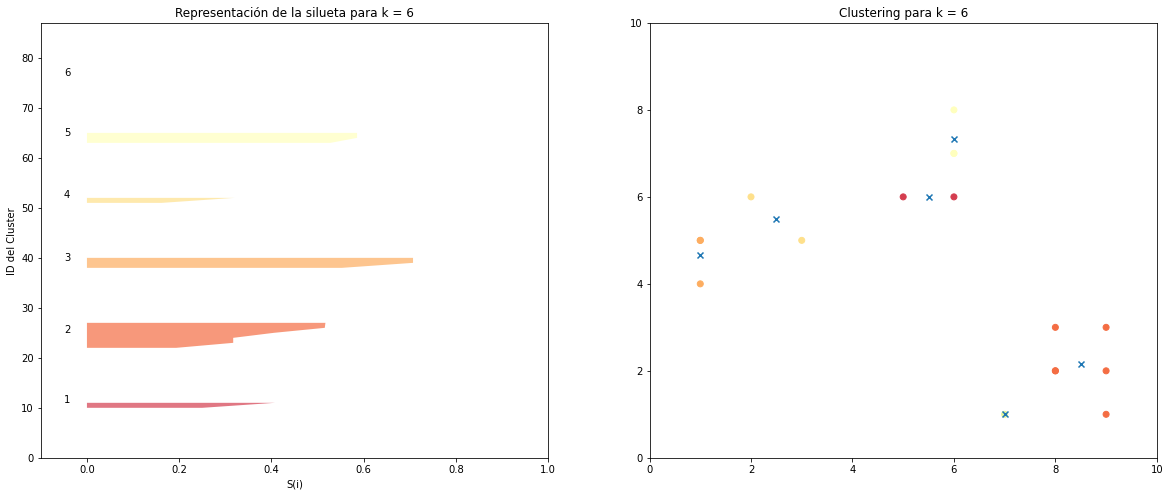

* Para k =  7  el promedio de la silueta es de : 0.3889390504750796
   - Para i =  1  la silueta del cluster vale :  0.24096929517637128
   - Para i =  2  la silueta del cluster vale :  0.30004208861569454
   - Para i =  3  la silueta del cluster vale :  0.32882042637679976
   - Para i =  4  la silueta del cluster vale :  0.3028895866899326
   - Para i =  5  la silueta del cluster vale :  0.5664789734180768
   - Para i =  6  la silueta del cluster vale :  0.655666655624379
   - Para i =  7  la silueta del cluster vale :  0.0


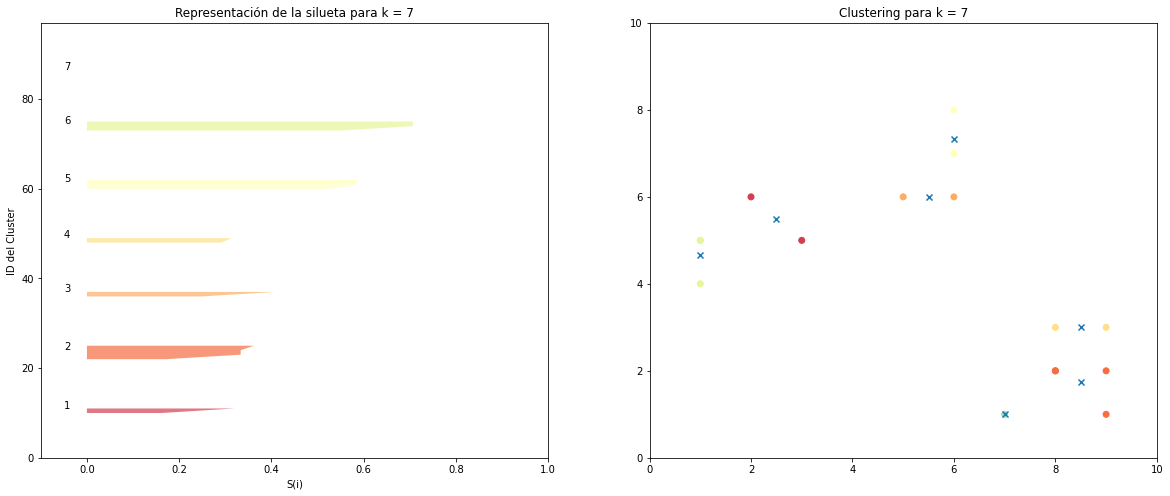

* Para k =  8  el promedio de la silueta es de : 0.35284612510104646
   - Para i =  1  la silueta del cluster vale :  0.31700053499298475
   - Para i =  2  la silueta del cluster vale :  0.32882042637679976
   - Para i =  3  la silueta del cluster vale :  0.6152265411044983
   - Para i =  4  la silueta del cluster vale :  0.5664789734180768
   - Para i =  5  la silueta del cluster vale :  0.263812295212263
   - Para i =  6  la silueta del cluster vale :  0.0
   - Para i =  7  la silueta del cluster vale :  0.0
   - Para i =  8  la silueta del cluster vale :  0.0


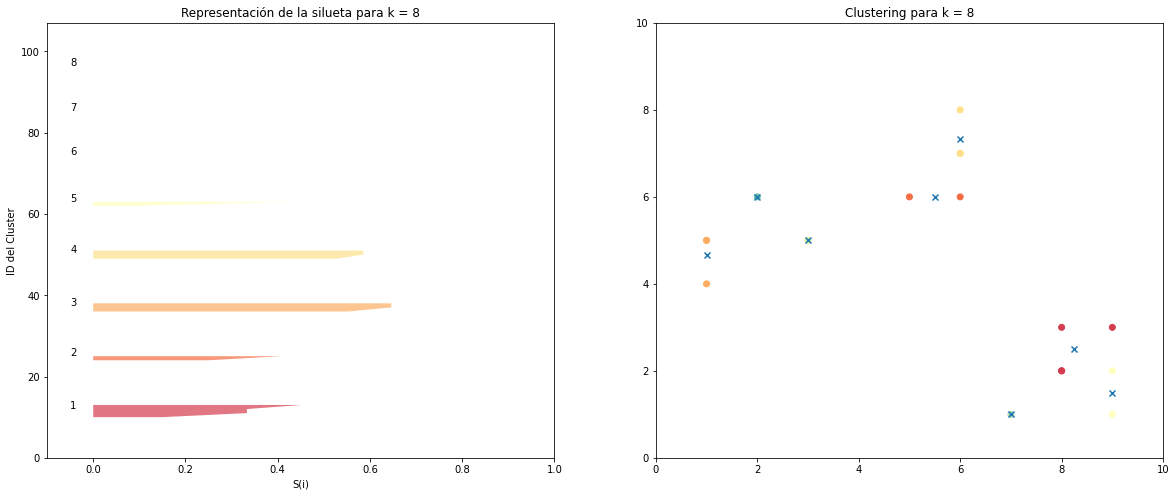

* Para k =  9  el promedio de la silueta es de : 0.34011594848992555
   - Para i =  1  la silueta del cluster vale :  0.32882042637679976
   - Para i =  2  la silueta del cluster vale :  0.39052429175126996
   - Para i =  3  la silueta del cluster vale :  0.6152265411044983
   - Para i =  4  la silueta del cluster vale :  0.5664789734180768
   - Para i =  5  la silueta del cluster vale :  0.0
   - Para i =  6  la silueta del cluster vale :  0.20382042637679978
   - Para i =  7  la silueta del cluster vale :  0.0
   - Para i =  8  la silueta del cluster vale :  0.0
   - Para i =  9  la silueta del cluster vale :  0.0


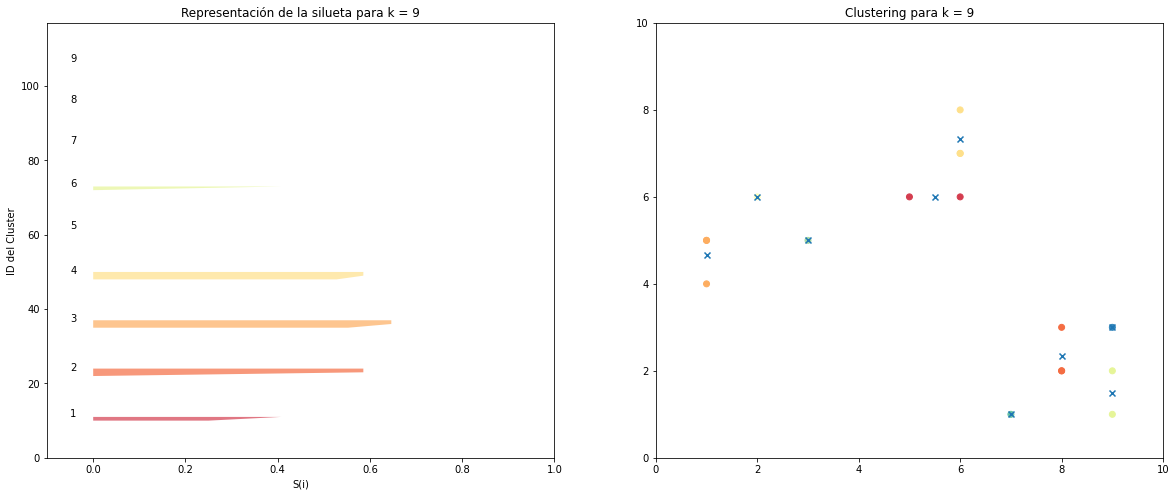

In [49]:
max_k = 10## maximo número de clusters que vamos a crear
K = range(1,max_k)
ssw = []

color_palette=[ plt.cm.Spectral(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1))


for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    ##Fabricaremos una silueta para cada cluster
    # Por seguridad, no hacemos silueta si k = 1 o k = len(X)
    if 1<k<len(X):
       ##Crear un subplot de una fila y dos columnas
        fig, (axis1,axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)
    
        #El primer subplot contendrá la silueta, que puede tener valores desde -1 a 1
        #En nuestro caso, ya controlamos que los valores están entre -0.1 y 1
        axis1.set_xlim([-0.1, 1.0])
        #El número de clusters a insertar determinará el tamaño de cada barra
        #El coeficiente (n_clusters+1)*10 será el espacio en blanco que dejaremos 
        #entre siluetas individuales de cada cluster para separarlas.
        axis1.set_ylim([0, len(X)+ (k+1)*10])
    
        silhouette_avg = silhouette_score(X, labels)
        print("* Para k = ",k, " el promedio de la silueta es de :",silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range(k):
            #Agregamos la silueta del cluster i-ésimo
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("   - Para i = ", i+1, " la silueta del cluster vale : ", np.mean(ith_cluster_sv))
            #Ordenamos descendientemente las siluetas del cluster i-ésimo
            ith_cluster_sv.sort()
        
            #Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            #Elegimos el color del cluster
            color = color_palette[i]
            
            #Pintamos la silueta del cluster i-ésimo
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            
            #Etiquetamos dicho cluster con el número en el centro
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))
            
            #Calculamos el nuevo y_lower para el siguiente cluster del gráfico
            y_lower = y_upper + 10 #dejamos vacías 10 posiciones sin muestra
            
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")
        
        ##Fin de la representación de la silueta
        
    ##Plot de los k-means con los puntos respectivos
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k = %s"%str(k))
    plt.scatter(x1,x2, c=label_color)
    plt.scatter(centers[0], centers[1], marker = "x")
    plt.show()

## Conclución
> Se nos dice que las siluetas deben ser parecidas pasa saber cual es el número de clusters optimos

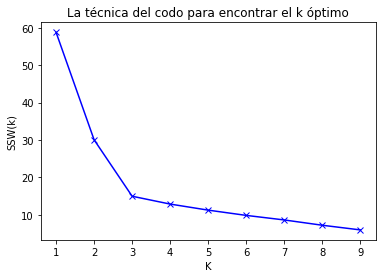

In [55]:
## utlizamos la suma de los cuadrados internos
## pintaremos la súma de los cuadrados con su respectiva linea azul con cuadridos y guiones
plt.plot(K, ssw, "bx-")
plt.xlabel("K")
plt.ylabel("SSW(k)")
plt.title("La técnica del codo para encontrar el k óptimo")
plt.show()

Text(0.5, 1.0, 'Técnica del codo normalizado para encontrar el k óptimo')

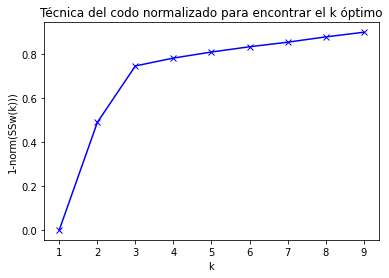

In [58]:
## el codo normalizado
plt.plot(K, 1-ssw/sst, "bx-")
plt.xlabel("k")
plt.ylabel("1-norm(SSw(k)))")
plt.title("Técnica del codo normalizado para encontrar el k óptimo")